In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# PRECIPITATION 

Data from the merged dataset(ANA precip for Brazil and ERA5 precip for non-Brazil) 

In [2]:
PRECIP = pd.read_csv('Data/merged_Precip.csv', usecols=['hydro_year', 'Precip_basin'])

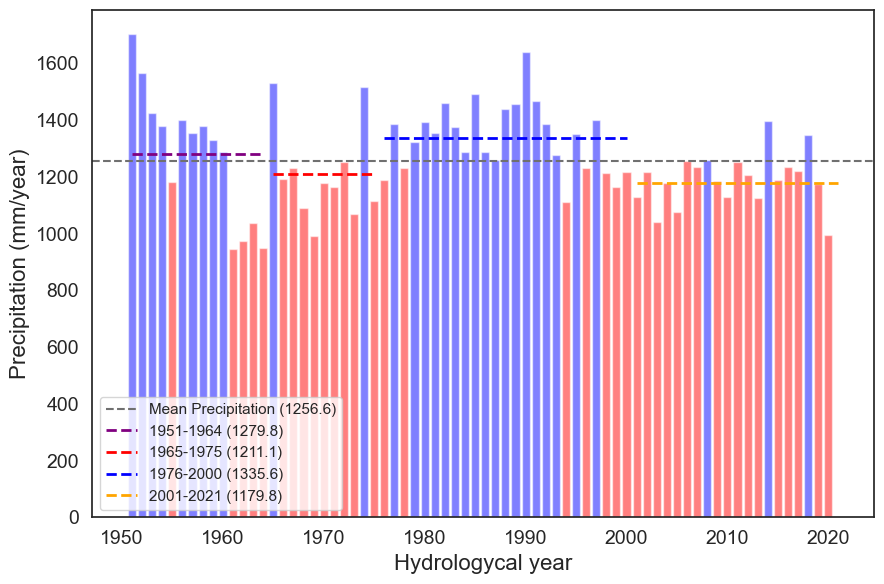

In [4]:
years = list(range(1951, 2021))
precipitation_data = PRECIP["Precip_basin"]
mean_precipitation = np.mean(precipitation_data)

sns.set(style="white",
        rc={"font.family": "sans-serif", "font.sans-serif": ["Arial", "Helvetica", "Verdana", "Trebuchet MS"]})

fig, ax = plt.subplots(figsize=(9, 6))

for year, precipitation in zip(years, precipitation_data):
    if precipitation > mean_precipitation:
        color = 'blue'
    else:
        color = 'red'

    ax.bar(year, precipitation, color=color, alpha=0.5)

# Add a horizontal line for the mean
ax.axhline(y=mean_precipitation, color='#707070', linestyle='--',
           label='Mean Precipitation ({:.1f})'.format(mean_precipitation))

# Averages
avg_period0 = PRECIP.loc[(PRECIP["hydro_year"] >= 1951) & (PRECIP["hydro_year"] <= 1964), "Precip_basin"].mean()
avg_period1 = PRECIP.loc[(PRECIP["hydro_year"] >= 1965) & (PRECIP["hydro_year"] <= 1975), "Precip_basin"].mean()
avg_period2 = PRECIP.loc[(PRECIP["hydro_year"] >= 1976) & (PRECIP["hydro_year"] <= 2000), "Precip_basin"].mean()
avg_period3 = PRECIP.loc[(PRECIP["hydro_year"] >= 2001) & (PRECIP["hydro_year"] <= 2021), "Precip_basin"].mean()

g = sns.lineplot(x=[1951, 1964], y=avg_period0, color='purple', linestyle='--', lw=2,
                 label="1951-1964 ({:.1f})".format(avg_period0))
g = sns.lineplot(x=[1965, 1975], y=avg_period1, color='red', linestyle='--', lw=2,
                 label="1965-1975 ({:.1f})".format(avg_period1))
g = sns.lineplot(x=[1976, 2000], y=avg_period2, color='blue', linestyle='--', lw=2,
                 label="1976-2000 ({:.1f})".format(avg_period2))
g = sns.lineplot(x=[2001, 2021], y=avg_period3, color='orange', linestyle='--', lw=2,
                 label="2001-2021 ({:.1f})".format(avg_period3))

# Set labels and title
ax.set_xlabel('Hydrologycal year', fontsize=16)
ax.set_ylabel('Precipitation (mm/year)', fontsize=16)
g.tick_params(axis='x', labelsize=14)
g.tick_params(axis='y', labelsize=14)

# Add legend with increased fontsize
legend = g.legend()
for label in legend.get_texts():
    label.set_fontsize(14)

legend = g.legend(loc='lower left')
# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
#plt.savefig('Figure2c.tiff', dpi=300, bbox_inches='tight')
plt.show()


# Runoff

In [3]:
RUNOFF = pd.read_csv('Data/Runoff_Obs_Predict.csv', usecols=['hydro_year', 'runoff_mm'])
RUNOFF = RUNOFF[(RUNOFF["hydro_year"] >= 1950) & (RUNOFF["hydro_year"] <= 2022)]
RUNOFF['runoff_mm'].mean()

125.98351254677284

In [4]:
WL = pd.read_csv('Data/ANA_WL.csv', usecols=['hydro_year', 'Media'])
#df2= df2[(df2["hydro_year"] >= 1950) & (df2["hydro_year"] <= 2022)]
WL['Media'].mean()

269.63700943864876

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

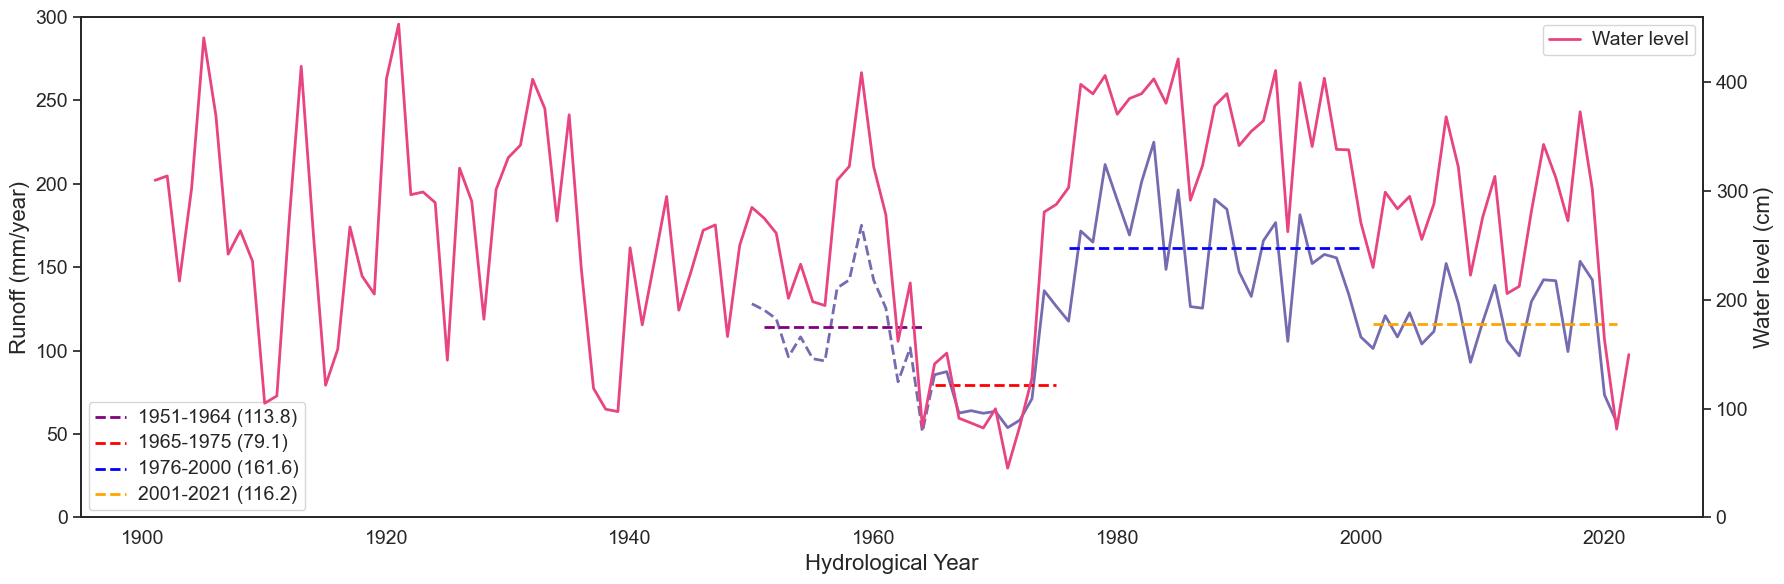

In [7]:
plt.figure(figsize=(18, 6))

# Create a single set of axes
ax = plt.gca()

# Plot the runoff data from 1950 to 1964 with a dashed line
ax = sns.lineplot(x='hydro_year', y='runoff_mm',
                  data=RUNOFF[(RUNOFF['hydro_year'] >= 1950) & (RUNOFF['hydro_year'] <= 1965)],
                  color='#756bb1', linestyle='dashed', lw=2)

# Plot the runoff data from 1965 onwards with a solid line
sns.lineplot(x='hydro_year', y='runoff_mm', data=RUNOFF[RUNOFF['hydro_year'] >= 1965], color='#756bb1', lw=2)

ax.set_xlabel("Hydrological Year", fontsize=16)
ax.set_ylabel("Runoff (mm/year)", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Set x and y axis limits
plt.ylim(0, 300)

# Plot the second y-axis (water level)
ax2 = ax.twinx()
sns.lineplot(x='hydro_year', y='Media', data=WL, ax=ax2, color='#E74481', label='Water level', lw=2)
ax2.set_ylabel('Water level (cm)', fontsize=16)
ax2.tick_params(axis='y', labelsize=14)
plt.ylim(0, 460)

legend1 = ax2.legend(loc='upper right')
for label in legend1.get_texts():
    label.set_fontsize(14)

# Averages
avg_period0 = RUNOFF.loc[(RUNOFF["hydro_year"] >= 1951) & (RUNOFF["hydro_year"] <= 1964), "runoff_mm"].mean()
avg_period1 = RUNOFF.loc[(RUNOFF["hydro_year"] >= 1965) & (RUNOFF["hydro_year"] <= 1975), "runoff_mm"].mean()
avg_period2 = RUNOFF.loc[(RUNOFF["hydro_year"] >= 1976) & (RUNOFF["hydro_year"] <= 2000), "runoff_mm"].mean()
avg_period3 = RUNOFF.loc[(RUNOFF["hydro_year"] >= 2001) & (RUNOFF["hydro_year"] <= 2021), "runoff_mm"].mean()

# Plot the average lines on the same axis as runoff
g = sns.lineplot(x=[1951, 1964], y=avg_period0, color='purple', linestyle='--', lw=2,
                 label="1951-1964 ({:.1f})".format(avg_period0), ax=ax)
g = sns.lineplot(x=[1965, 1975], y=avg_period1, color='red', linestyle='--', lw=2,
                 label="1965-1975 ({:.1f})".format(avg_period1), ax=ax)
g = sns.lineplot(x=[1976, 2000], y=avg_period2, color='blue', linestyle='--', lw=2,
                 label="1976-2000 ({:.1f})".format(avg_period2), ax=ax)
g = sns.lineplot(x=[2001, 2021], y=avg_period3, color='orange', linestyle='--', lw=2,
                 label="2001-2021 ({:.1f})".format(avg_period3), ax=ax)

# Add legend with increased fontsize
legend = g.legend(loc='lower left')
for label in legend.get_texts():
    label.set_fontsize(14)

# Display the plot
plt.tight_layout()
#plt.savefig('Figure2e.tiff', dpi=300, bbox_inches='tight')
plt.show()

# PET

In [5]:
PET = pd.read_csv('Data/ERA-5_annualPET_BHPM.csv')

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

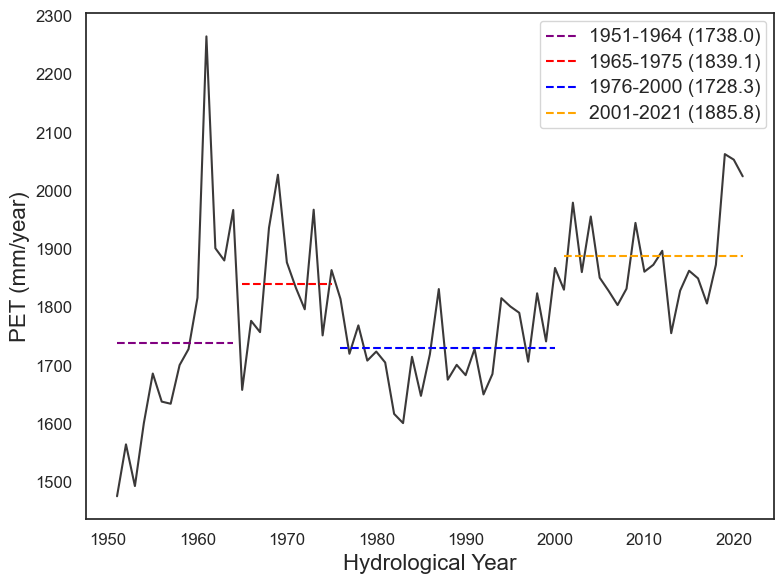

In [9]:
# Plot settings
plt.figure(figsize=(8, 6))
g = sns.lineplot(x="hydro_year", y="ETr", color='#3b3939', data=PET)
g.set_xlabel("Hydrological Year", fontsize=16)
g.set_ylabel("PET (mm/year)", fontsize=16)
g.tick_params(axis='x', labelsize=12)
g.tick_params(axis='y', labelsize=12)

# Averages
avg_period0 = PET.loc[(PET["hydro_year"] >= 1951) & (PET["hydro_year"] <= 1964), "ETr"].mean()
avg_period1 = PET.loc[(PET["hydro_year"] >= 1965) & (PET["hydro_year"] <= 1975), "ETr"].mean()
avg_period2 = PET.loc[(PET["hydro_year"] >= 1976) & (PET["hydro_year"] <= 2000), "ETr"].mean()
avg_period3 = PET.loc[(PET["hydro_year"] >= 2001) & (PET["hydro_year"] <= 2021), "ETr"].mean()

g = sns.lineplot(x=[1951, 1964], y=avg_period0, color='purple', linestyle='--',
                 label="1951-1964 ({:.1f})".format(avg_period0))
g = sns.lineplot(x=[1965, 1975], y=avg_period1, color='red', linestyle='--',
                 label="1965-1975 ({:.1f})".format(avg_period1))
g = sns.lineplot(x=[1976, 2000], y=avg_period2, color='blue', linestyle='--',
                 label="1976-2000 ({:.1f})".format(avg_period2))
g = sns.lineplot(x=[2001, 2021], y=avg_period3, color='orange', linestyle='--',
                 label="2001-2021 ({:.1f})".format(avg_period3))

g.legend()
# Add legend with increased fontsize
legend = g.legend()
for label in legend.get_texts():
    label.set_fontsize(14)

# Display the plot
plt.tight_layout()
#plt.savefig('Figure3c.tiff', dpi=300, bbox_inches='tight')
plt.show()

# TEMPERATURE

In [6]:
TEMP = pd.read_csv('Data/ERA-5_annualTEMP_BHPM.csv')

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

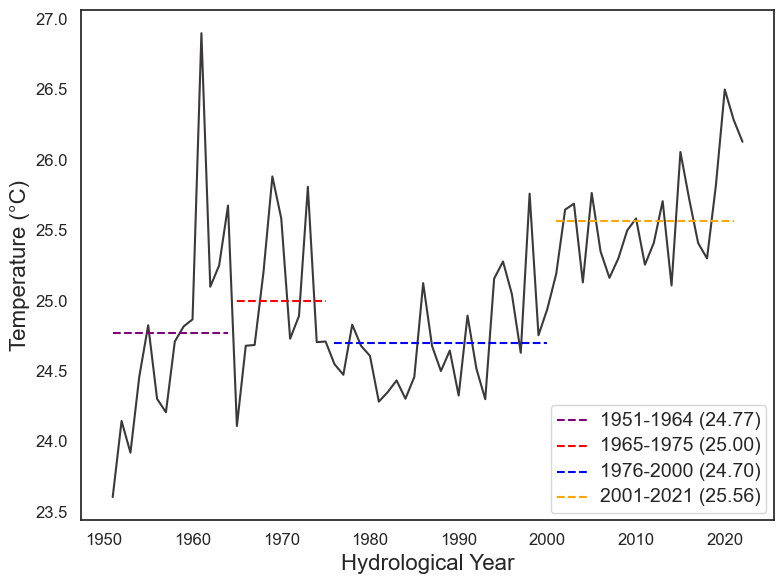

In [11]:
plt.figure(figsize=(8, 6))
# Plot settings
g = sns.lineplot(x="hydro_year", y="TEMP", color='#3b3939', data=TEMP)
g.set_xlabel("Hydrological Year", fontsize=16)
g.set_ylabel("Temperature (°C)", fontsize=16)
g.tick_params(axis='x', labelsize=12) 
g.tick_params(axis='y', labelsize=12)


# Averages
avg_period0 = TEMP.loc[(TEMP["hydro_year"] >= 1951) & (TEMP["hydro_year"] <= 1964), "TEMP"].mean()
avg_period1 = TEMP.loc[(TEMP["hydro_year"] >= 1965) & (TEMP["hydro_year"] <= 1975), "TEMP"].mean()
avg_period2 = TEMP.loc[(TEMP["hydro_year"] >= 1976) & (TEMP["hydro_year"] <= 2000), "TEMP"].mean()
avg_period3 = TEMP.loc[(TEMP["hydro_year"] >= 2001) & (TEMP["hydro_year"] <= 2021), "TEMP"].mean()

g = sns.lineplot(x=[1951,1964], y=avg_period0, color='purple', linestyle='--', label="1951-1964 ({:.2f})".format(avg_period0))
g = sns.lineplot(x=[1965,1975], y=avg_period1, color='red', linestyle='--', label="1965-1975 ({:.2f})".format(avg_period1))
g = sns.lineplot(x=[1976,2000], y=avg_period2, color='blue', linestyle='--', label="1976-2000 ({:.2f})".format(avg_period2))                                                   
g = sns.lineplot(x=[2001,2021], y=avg_period3, color='orange', linestyle='--', label="2001-2021 ({:.2f})".format(avg_period3))
     
g.legend()
# Add legend with increased fontsize
legend = g.legend()
for label in legend.get_texts():
    label.set_fontsize(14)
    
# Display the plot
plt.tight_layout()
#plt.savefig('Figure3d_new.tiff', dpi=300, bbox_inches='tight')
plt.show()

# VPD

In [7]:
VPD = pd.read_csv('Data/ERA-5_annualVPD'
                 '_BHPM.csv')

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

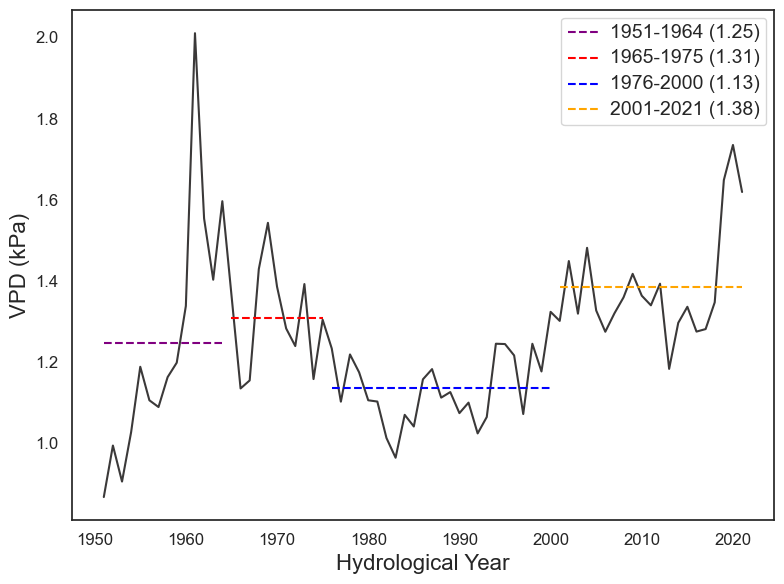

In [13]:
plt.figure(figsize=(8, 6))

g = sns.lineplot(x="hydro_year", y="VPD", color='#3b3939', data=VPD)
g.set_xlabel("Hydrological Year", fontsize=16)
g.set_ylabel("VPD (kPa)", fontsize=16)
g.tick_params(axis='x', labelsize=12)
g.tick_params(axis='y', labelsize=12)

# Averages
avg_period0 = VPD.loc[(VPD["hydro_year"] >= 1951) & (VPD["hydro_year"] <= 1964), "VPD"].mean()
avg_period1 = VPD.loc[(VPD["hydro_year"] >= 1965) & (VPD["hydro_year"] <= 1975), "VPD"].mean()
avg_period2 = VPD.loc[(VPD["hydro_year"] >= 1976) & (VPD["hydro_year"] <= 2000), "VPD"].mean()
avg_period3 = VPD.loc[(VPD["hydro_year"] >= 2001) & (VPD["hydro_year"] <= 2021), "VPD"].mean()

g = sns.lineplot(x=[1951, 1964], y=avg_period0, color='purple', linestyle='--',
                 label="1951-1964 ({:.2f})".format(avg_period0))
g = sns.lineplot(x=[1965, 1975], y=avg_period1, color='red', linestyle='--',
                 label="1965-1975 ({:.2f})".format(avg_period1))
g = sns.lineplot(x=[1976, 2000], y=avg_period2, color='blue', linestyle='--',
                 label="1976-2000 ({:.2f})".format(avg_period2))
g = sns.lineplot(x=[2001, 2021], y=avg_period3, color='orange', linestyle='--',
                 label="2001-2021 ({:.2f})".format(avg_period3))

g.legend()
# Add legend with increased fontsize
legend = g.legend()
for label in legend.get_texts():
    label.set_fontsize(14)

# Display the plot
plt.tight_layout()
#plt.savefig('Figure3f.tiff', dpi=300, bbox_inches='tight')
plt.show()

# RUNOFF COEFFICIENT AND ARIDITY INDEX

In [8]:
df = pd.merge(RUNOFF, PET, left_on='hydro_year', right_on='hydro_year')
df = pd.merge(df, PRECIP, left_on='hydro_year', right_on='hydro_year')
df = pd.merge(df, WL, left_on='hydro_year', right_on='hydro_year')
df = pd.merge(df, TEMP, left_on='hydro_year', right_on='hydro_year')
df = pd.merge(df, VPD, left_on='hydro_year', right_on='hydro_year')

In [37]:
df.head()

,hydro_year,runoff_mm,ETr,Precip_basin,Media,TEMP,VPD
0,1951,124.271667,1474.160677,1703.110293,275.083333,23.603652,0.866130
1,1952,119.015000,1563.268574,1567.427573,261.250000,24.144491,0.993236
2,1953,96.246667,1491.648494,1426.372978,201.333333,23.918630,0.904352
3,1954,108.153333,1599.684292,1378.111283,232.666667,24.461086,1.026580
4,1955,95.075000,1684.820998,1183.404460,198.250000,24.823975,1.187586


In [28]:
#Calculating runoff ratio:
runoff_ratio = df['runoff_mm'] / df['Precip_basin']
df.insert(4, "Q/P", runoff_ratio)

In [29]:
#Calculating the aritidy index:
ratioPET_P = df['ETr'] / df['Precip_basin']
df.insert(5, "PET/P", ratioPET_P)

In [30]:
df

,hydro_year,runoff_mm,ETr,Precip_basin,Q/P,PET/P,Media,TEMP,VPD
0,1951,124.271667,1474.160677,1703.110293,0.072967,0.865570,275.083333,23.603652,0.866130
1,1952,119.015000,1563.268574,1567.427573,0.075930,0.997347,261.250000,24.144491,0.993236
2,1953,96.246667,1491.648494,1426.372978,0.067477,1.045763,201.333333,23.918630,0.904352
3,1954,108.153333,1599.684292,1378.111283,0.078479,1.160780,232.666667,24.461086,1.026580
4,1955,95.075000,1684.820998,1183.404460,0.080340,1.423707,198.250000,24.823975,1.187586
...,...,...,...,...,...,...,...,...,...
66,2017,99.377586,1804.993058,1219.694359,0.081477,1.479873,272.583333,25.408223,1.280550
67,2018,153.492684,1871.578697,1349.154932,0.113770,1.387223,372.833333,25.298912,1.346533
68,2019,142.397287,2061.471085,1173.942484,0.121298,1.756024,301.750000,25.818346,1.648267
69,2020,73.324309,2051.935501,993.332654,0.073816,2.065708,163.250000,26.499025,1.734811


C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

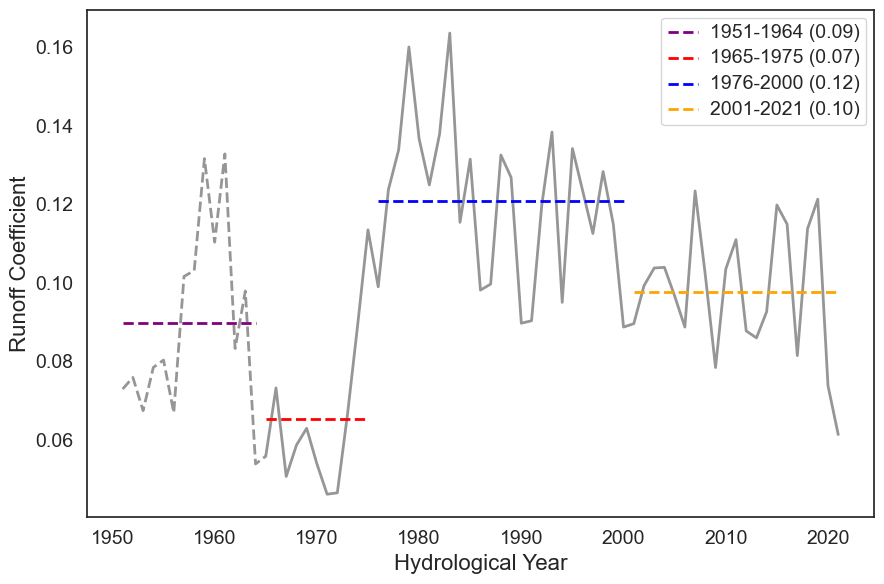

In [31]:
# Plot settings
plt.figure(figsize=(9, 6))

# Plot the runoff data from 1950 to 1964 with a dashed line
ax = sns.lineplot(x='hydro_year', y='Q/P', data=df[(df['hydro_year'] >= 1950) & (df['hydro_year'] <= 1965)],
                  color='#969696', linestyle='dashed', lw=2)

# Plot the runoff data from 1965 onwards with a solid line
sns.lineplot(x='hydro_year', y='Q/P', data=df[df['hydro_year'] >= 1965], color='#969696', lw=2)

ax.set_xlabel("Hydrological Year", fontsize=16)
plt.ylabel("Runoff Coefficient", fontsize=16)

ax.tick_params(axis='x', labelsize=14) 
ax.tick_params(axis='y', labelsize=14)

# Averages
#avg_period0 = df.loc[(df["hydro_year"] >= 1950) & (df["hydro_year"] <= 1964), "Q/P"].mean()
avg_period0 = df.loc[(df["hydro_year"] >= 1951) & (df["hydro_year"] <= 1964), "Q/P"].mean()
avg_period1 = df.loc[(df["hydro_year"] >= 1965) & (df["hydro_year"] <= 1975), "Q/P"].mean()
avg_period2 = df.loc[(df["hydro_year"] >= 1976) & (df["hydro_year"] <= 2000), "Q/P"].mean()
avg_period3 = df.loc[(df["hydro_year"] >= 2001) & (df["hydro_year"] <= 2021), "Q/P"].mean()

g = sns.lineplot(x=[1951,1964], y=avg_period0, color='purple', linestyle='--', lw=2, label="1951-1964 ({:.2f})".format(avg_period0), ax=ax)
g = sns.lineplot(x=[1965,1975], y=avg_period1, color='red', linestyle='--', lw=2,label="1965-1975 ({:.2f})".format(avg_period1))
g = sns.lineplot(x=[1976,2000], y=avg_period2, color='blue', linestyle='--', lw=2,label="1976-2000 ({:.2f})".format(avg_period2))                                                   
g = sns.lineplot(x=[2001,2021], y=avg_period3, color='orange', linestyle='--', lw=2, label="2001-2021 ({:.2f})".format(avg_period3))
     
# Add legend with increased fontsize
legend = g.legend()
for label in legend.get_texts():
    label.set_fontsize(14)



# Display the plot
plt.tight_layout()
#plt.savefig('Figure2d.tiff', dpi=300, bbox_inches='tight')
plt.show()

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

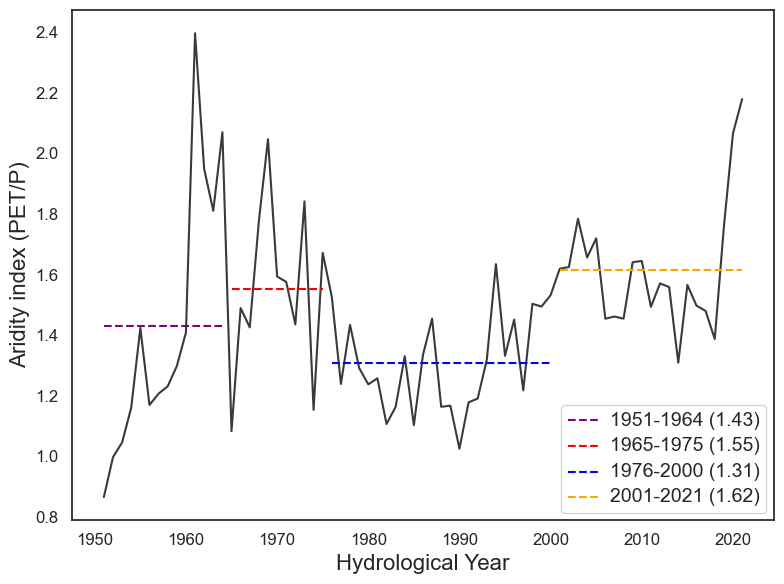

In [32]:

plt.figure(figsize=(8, 6))
g = sns.lineplot(x="hydro_year", y="PET/P", color='#3b3939', data=df)
g.set_xlabel("Hydrological Year", fontsize=16)
g.set_ylabel("Aridity index (PET/P)", fontsize=16)
g.tick_params(axis='x', labelsize=12) 
g.tick_params(axis='y', labelsize=12)

# Averages
avg_period0 = df.loc[(df["hydro_year"] >= 1951) & (df["hydro_year"] <= 1964), "PET/P"].mean()
avg_period1 = df.loc[(df["hydro_year"] >= 1965) & (df["hydro_year"] <= 1975), "PET/P"].mean()
avg_period2 = df.loc[(df["hydro_year"] >= 1976) & (df["hydro_year"] <= 2000), "PET/P"].mean()
avg_period3 = df.loc[(df["hydro_year"] >= 2001) & (df["hydro_year"] <= 2021), "PET/P"].mean()

g = sns.lineplot(x=[1951,1964], y=avg_period0, color='purple', linestyle='--', label="1951-1964 ({:.2f})".format(avg_period0))
g = sns.lineplot(x=[1965,1975], y=avg_period1, color='red', linestyle='--', label="1965-1975 ({:.2f})".format(avg_period1))
g = sns.lineplot(x=[1976,2000], y=avg_period2, color='blue', linestyle='--', label="1976-2000 ({:.2f})".format(avg_period2))                                                   
g = sns.lineplot(x=[2001,2021], y=avg_period3, color='orange', linestyle='--', label="2001-2021 ({:.2f})".format(avg_period3))
     
g.legend()
# Add legend with increased fontsize
legend = g.legend()
for label in legend.get_texts():
    label.set_fontsize(14)
    
# Display the plot
plt.tight_layout()
#plt.savefig('Figure3e.tiff', dpi=300, bbox_inches='tight')
plt.show()

Runoff x Precipitation

In [9]:
import statsmodels.api as sm

In [10]:
# Divide the dataset into three periods
periods = pd.cut(df['hydro_year'], bins=[1950, 1964, 1975, 2000, 2022], labels=['1951-1964','1965-1975', '1976-2000', '2001-2021'])
df['Period'] = periods

In [11]:
df

,hydro_year,runoff_mm,ETr,Precip_basin,Media,TEMP,VPD,Period
0,1951,124.271667,1474.160677,1703.110293,275.083333,23.603652,0.866130,1951-1964
1,1952,119.015000,1563.268574,1567.427573,261.250000,24.144491,0.993236,1951-1964
2,1953,96.246667,1491.648494,1426.372978,201.333333,23.918630,0.904352,1951-1964
3,1954,108.153333,1599.684292,1378.111283,232.666667,24.461086,1.026580,1951-1964
4,1955,95.075000,1684.820998,1183.404460,198.250000,24.823975,1.187586,1951-1964
...,...,...,...,...,...,...,...,...
66,2017,99.377586,1804.993058,1219.694359,272.583333,25.408223,1.280550,2001-2021
67,2018,153.492684,1871.578697,1349.154932,372.833333,25.298912,1.346533,2001-2021
68,2019,142.397287,2061.471085,1173.942484,301.750000,25.818346,1.648267,2001-2021
69,2020,73.324309,2051.935501,993.332654,163.250000,26.499025,1.734811,2001-2021


<Figure size 800x600 with 0 Axes>

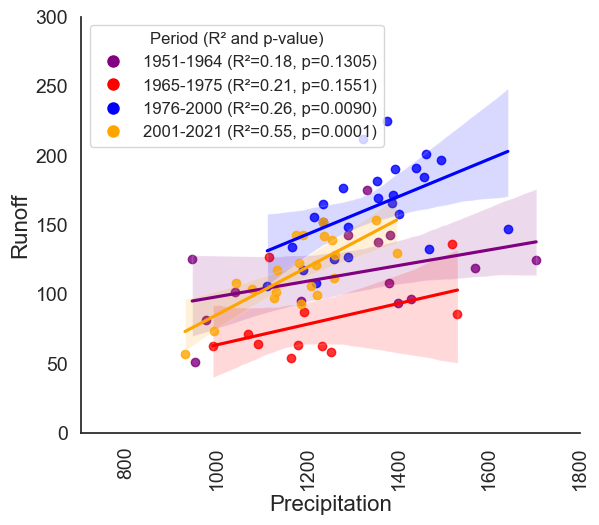

In [45]:
# Plot lmplot for each period
plt.figure(figsize=(8, 6))  # Adjust the figure size here

# Initialize a dictionary to store R-squared and p-values for each period
rsquared_pvalue_dict = {}

# Initialize a list to store legend handles
legend_handles = []

palette = ["purple", "red", 'blue', 'orange']
# Define a unique set of colors and markers for the legend handles
unique_colors = sns.color_palette(palette, len(df['Period'].unique()))
markers = ['o', 'o', 'o', 'o']  # You can choose any marker styles you prefer

g = sns.lmplot(x="Precip_basin", y="runoff_mm", data=df, hue='Period', palette=["purple", "red", 'blue', 'orange'],
               height=5, aspect=1.2)

# Iterate through each period to fit a linear regression model and calculate R-squared and p-value
for i, period in enumerate(df['Period'].unique()):
    subset = df[df['Period'] == period]
    X = sm.add_constant(subset['Precip_basin'])
    model = sm.OLS(subset['runoff_mm'], X).fit()
    rsquared = model.rsquared
    p_value = model.f_pvalue  # This calculates the p-value for the overall model
    rsquared_pvalue_dict[period] = (rsquared, p_value)

    # Create a legend handle with the appropriate color and marker
    legend_handles.append(plt.Line2D([0], [0], marker=markers[i], color='w', markerfacecolor=unique_colors[i],
                                     markersize=10, label=f'{period} (R²={rsquared:.2f}, p={p_value:.4f})'))
g._legend.remove()

# Set axis labels
plt.xlabel('Precipitation', fontsize=16)
plt.ylabel('Runoff', fontsize=16)

plt.xlim(700, 1800)
plt.ylim(0, 300)

# Increase the x and y-axis tick label font sizes
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

# Create a legend outside the lmplot with a specified title fontsize
plt.legend(title="Period (R² and p-value)", handles=legend_handles, loc='upper left', fontsize=12, title_fontsize=12)
#plt.savefig('Figure2b_.tiff', dpi=300, bbox_inches='tight')
plt.show()

# Correlation between variables

## For 1950-2021 (without wetland area)

C:\Users\cb3910\AppData\Local\Temp\ipykernel_29280\192631053.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  p_values[row][col] = p_value


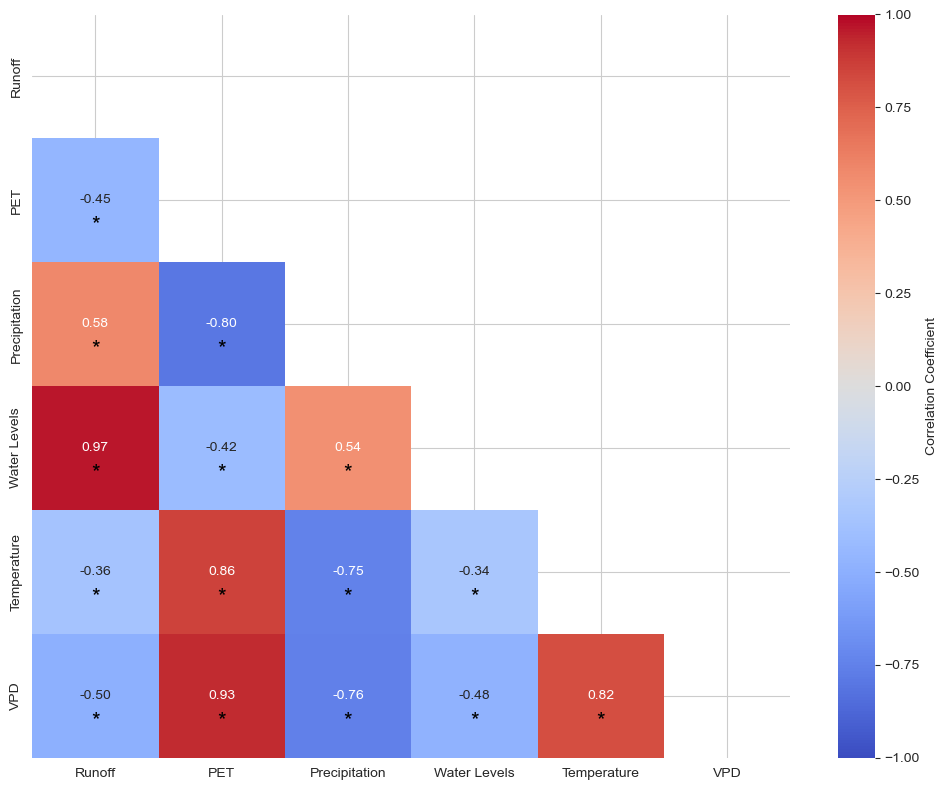

In [24]:
# subset of the relevant columns
variables = ['runoff_mm', 'ETr', 'Precip_basin', 'Media', 'TEMP', 'VPD']
data = df[variables]

data = data.rename(columns={
    'runoff_mm': 'Runoff', 
    'ETr': 'PET', 
    'Precip_basin': 'Precipitation', 
    'Media': 'Water Levels', 
    'TEMP': 'Temperature', 
    'VPD': 'VPD'
})

# Calculate the correlation matrix
correlation_matrix = data.corr(method='spearman')

# Function to calculate p-values for each pair of variables
def calculate_p_values(data):
    p_values = pd.DataFrame(index=data.columns, columns=data.columns)
    for row in data.columns:
        for col in data.columns:
            _, p_value = stats.pearsonr(data[row], data[col])
            p_values[row][col] = p_value
    return p_values

# Calculate the p-values matrix
p_values_matrix = calculate_p_values(data)

# Create a mask for the heatmap to display only the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap for correlation coefficients
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            fmt='.2f', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})

# Overlay the significance levels (p-values)
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        p_value = p_values_matrix.iloc[i, j]
        if p_value < 0.05:
            # Adjust position to below the number
            plt.text(j + 0.5, i + 0.7, '*', ha='center', va='center', color='black', fontsize=16)

# Add a title
#plt.title('Correlation Matrix with Significance Levels', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

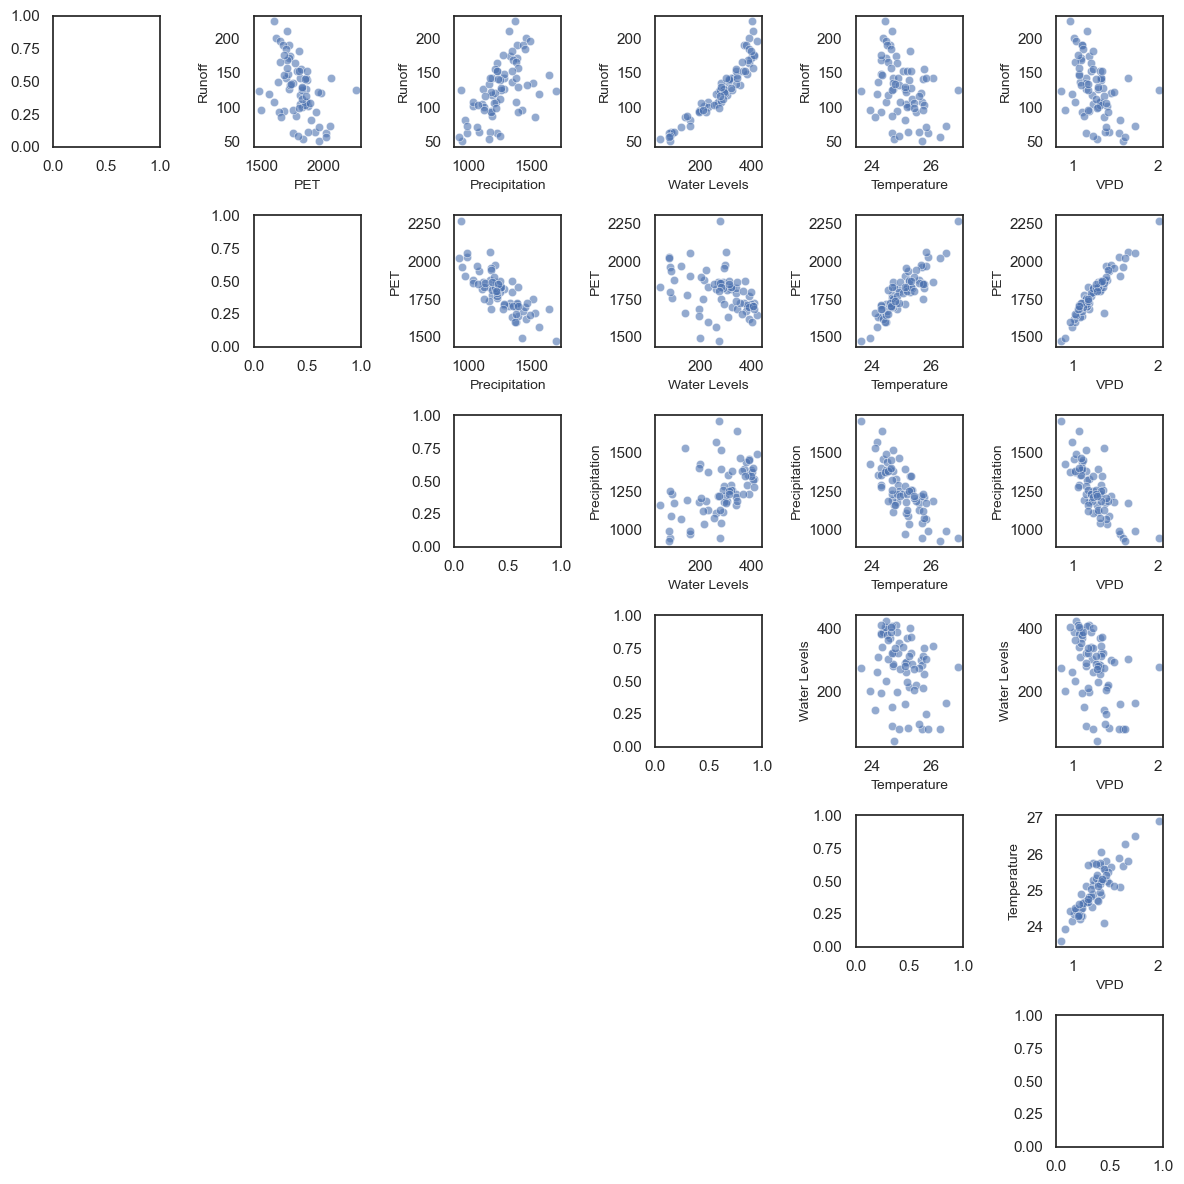

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Suponha que seu dataset esteja armazenado em um DataFrame chamado 'df'
# e que as colunas relevantes sejam 'runoff_mm', 'ETr', 'Precip_basin', 'Media', 'TEMP', 'VPD'

# Criar um subconjunto das colunas relevantes
variables = ['runoff_mm', 'ETr', 'Precip_basin', 'Media', 'TEMP', 'VPD']
data = df[variables]

# Renomear as colunas para rótulos mais descritivos
data = data.rename(columns={
    'runoff_mm': 'Runoff', 
    'ETr': 'PET', 
    'Precip_basin': 'Precipitation', 
    'Media': 'Water Levels', 
    'TEMP': 'Temperature', 
    'VPD': 'VPD'
})

# Número de variáveis
num_vars = len(variables)

# Criar uma matriz de subplots
fig, axes = plt.subplots(num_vars, num_vars, figsize=(12, 12))

# Loop para plotar gráficos de dispersão na parte superior
for i in range(num_vars):
    for j in range(num_vars):
        if i < j:
            sns.scatterplot(data=data, x=data.columns[j], y=data.columns[i], ax=axes[i, j], alpha=0.6)
            axes[i, j].set_xlabel(data.columns[j], fontsize=10)
            axes[i, j].set_ylabel(data.columns[i], fontsize=10)
        elif i > j:
            axes[i, j].axis('off')  # Desliga os eixos para a parte inferior

# Ajustar o layout
plt.tight_layout()
plt.show()


## For 1985-2021 (with wetland area)

In [18]:
wetland = pd.read_csv(r'G:\My Drive\Doutorado\TESE\2. Artigo 2\Artigo Pantanal - LULCC\Codes\pantanal-lc\2024_reviews\Data\data_landuse.csv', usecols=['Year', 'Wetland'])
df_wetland = pd.merge(df, wetland, left_on='hydro_year', right_on='Year')

In [19]:
df_wetland

,hydro_year,runoff_mm,ETr,Precip_basin,Media,TEMP,VPD,Period,Year,Wetland
0,1985,196.278938,1646.498916,1493.006892,421.472222,24.456483,1.040222,1976-2000,1985,40267.01494
1,1986,126.323008,1717.882276,1286.991058,291.500000,25.123061,1.156635,1976-2000,1986,29413.61143
2,1987,125.394197,1829.802569,1257.968803,323.333333,24.677141,1.181786,1976-2000,1987,34413.58145
3,1988,190.720652,1674.272956,1439.051166,378.250000,24.498971,1.111431,1976-2000,1988,39184.03034
4,1989,184.699894,1699.735436,1456.307910,389.500000,24.644533,1.125152,1976-2000,1989,41700.34657
5,1990,147.210822,1682.018240,1640.735594,341.750000,24.325102,1.073199,1976-2000,1990,27095.45722
6,1991,132.436412,1726.934361,1465.721789,354.833333,24.892865,1.099120,1976-2000,1991,36460.71256
7,1992,165.859194,1648.966938,1384.810636,364.583333,24.516069,1.023178,1976-2000,1992,33283.14600
8,1993,176.698592,1683.996964,1276.927842,410.833333,24.298996,1.063587,1976-2000,1993,35347.28361
9,1994,105.487317,1814.171522,1109.994100,262.555556,25.155122,1.244406,1976-2000,1994,22552.03512


C:\Users\cb3910\AppData\Local\Temp\ipykernel_29280\3935151904.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  p_values[row][col] = p_value


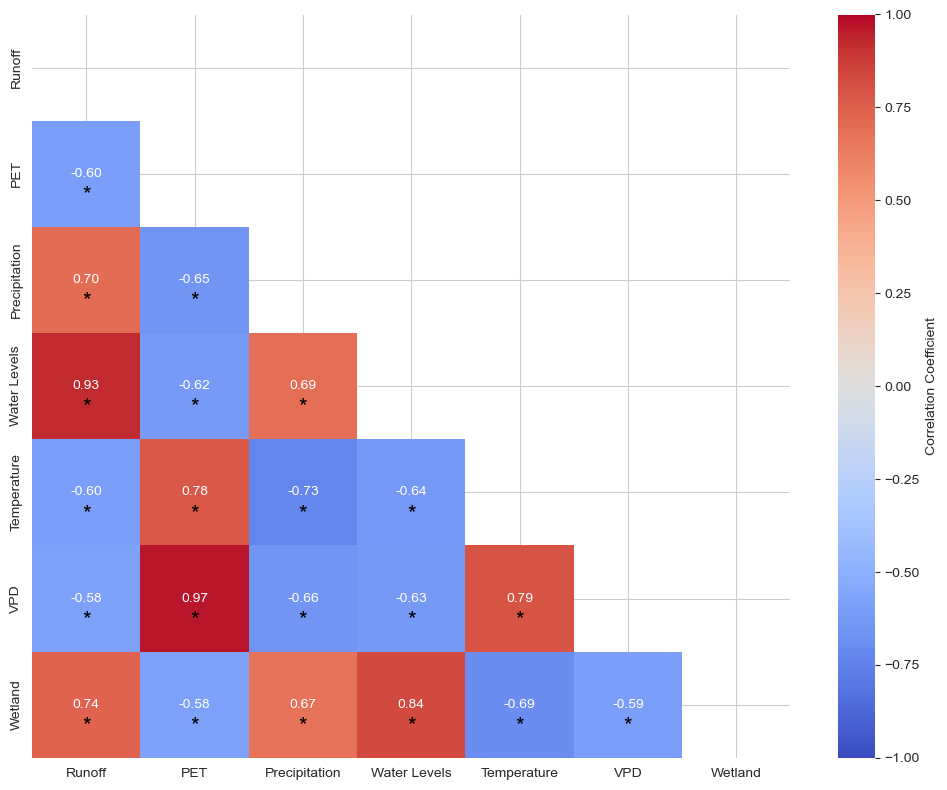

In [22]:
# subset of the relevant columns
variables = ['runoff_mm', 'ETr', 'Precip_basin', 'Media', 'TEMP', 'VPD', 'Wetland']
data = df_wetland[variables]

data = data.rename(columns={
    'runoff_mm': 'Runoff', 
    'ETr': 'PET', 
    'Precip_basin': 'Precipitation', 
    'Media': 'Water Levels', 
    'TEMP': 'Temperature', 
    'VPD': 'VPD',
    'Wetland': 'Wetland'
})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Function to calculate p-values for each pair of variables
def calculate_p_values(data):
    p_values = pd.DataFrame(index=data.columns, columns=data.columns)
    for row in data.columns:
        for col in data.columns:
            _, p_value = stats.pearsonr(data[row], data[col])
            p_values[row][col] = p_value
    return p_values

# Calculate the p-values matrix
p_values_matrix = calculate_p_values(data)

# Create a mask for the heatmap to display only the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap for correlation coefficients
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            fmt='.2f', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})

# Overlay the significance levels (p-values)
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        p_value = p_values_matrix.iloc[i, j]
        if p_value < 0.05:
            # Adjust position to below the number
            plt.text(j + 0.5, i + 0.7, '*', ha='center', va='center', color='black', fontsize=16)

# Add a title
#plt.title('Correlation Matrix with Significance Levels', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\cb3910\AppData\Local\Temp\ipykernel_29280\677187641.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  p_values[row][col] = p_value


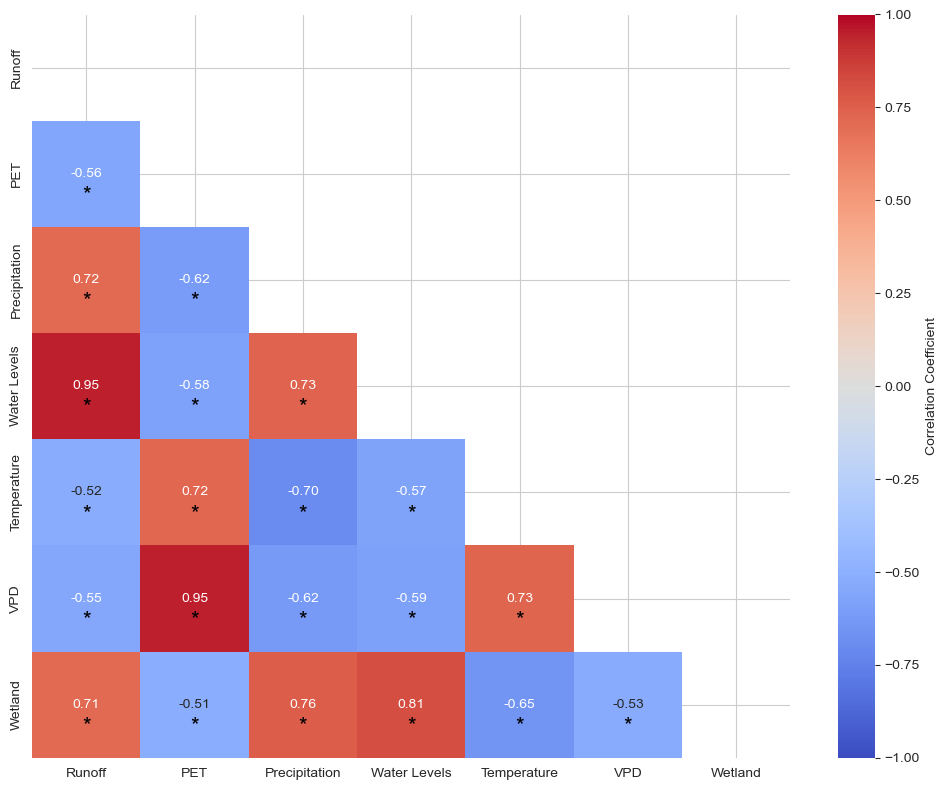

In [25]:
# subset of the relevant columns
variables = ['runoff_mm', 'ETr', 'Precip_basin', 'Media', 'TEMP', 'VPD', 'Wetland']
data = df_wetland[variables]

data = data.rename(columns={
    'runoff_mm': 'Runoff', 
    'ETr': 'PET', 
    'Precip_basin': 'Precipitation', 
    'Media': 'Water Levels', 
    'TEMP': 'Temperature', 
    'VPD': 'VPD',
    'Wetland': 'Wetland'
})

# Calculate the correlation matrix
correlation_matrix = data.corr(method="spearman")

# Function to calculate p-values for each pair of variables
def calculate_p_values(data):
    p_values = pd.DataFrame(index=data.columns, columns=data.columns)
    for row in data.columns:
        for col in data.columns:
            _, p_value = stats.pearsonr(data[row], data[col])
            p_values[row][col] = p_value
    return p_values

# Calculate the p-values matrix
p_values_matrix = calculate_p_values(data)

# Create a mask for the heatmap to display only the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap for correlation coefficients
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            fmt='.2f', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})

# Overlay the significance levels (p-values)
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        p_value = p_values_matrix.iloc[i, j]
        if p_value < 0.05:
            # Adjust position to below the number
            plt.text(j + 0.5, i + 0.7, '*', ha='center', va='center', color='black', fontsize=16)

# Add a title
#plt.title('Correlation Matrix with Significance Levels', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

# Budyko Analysis

In [33]:
aridity_index = df['PET/P']
evaporative_index = 1 - (df["Q/P"])
years = df['hydro_year']

C:\Users\cb3910\AppData\Local\Temp\ipykernel_132072\1424452239.py:24: RuntimeWarning: divide by zero encountered in divide
  return (phi * np.tanh(1 / phi) * (1 - np.exp(- phi))) ** 0.5


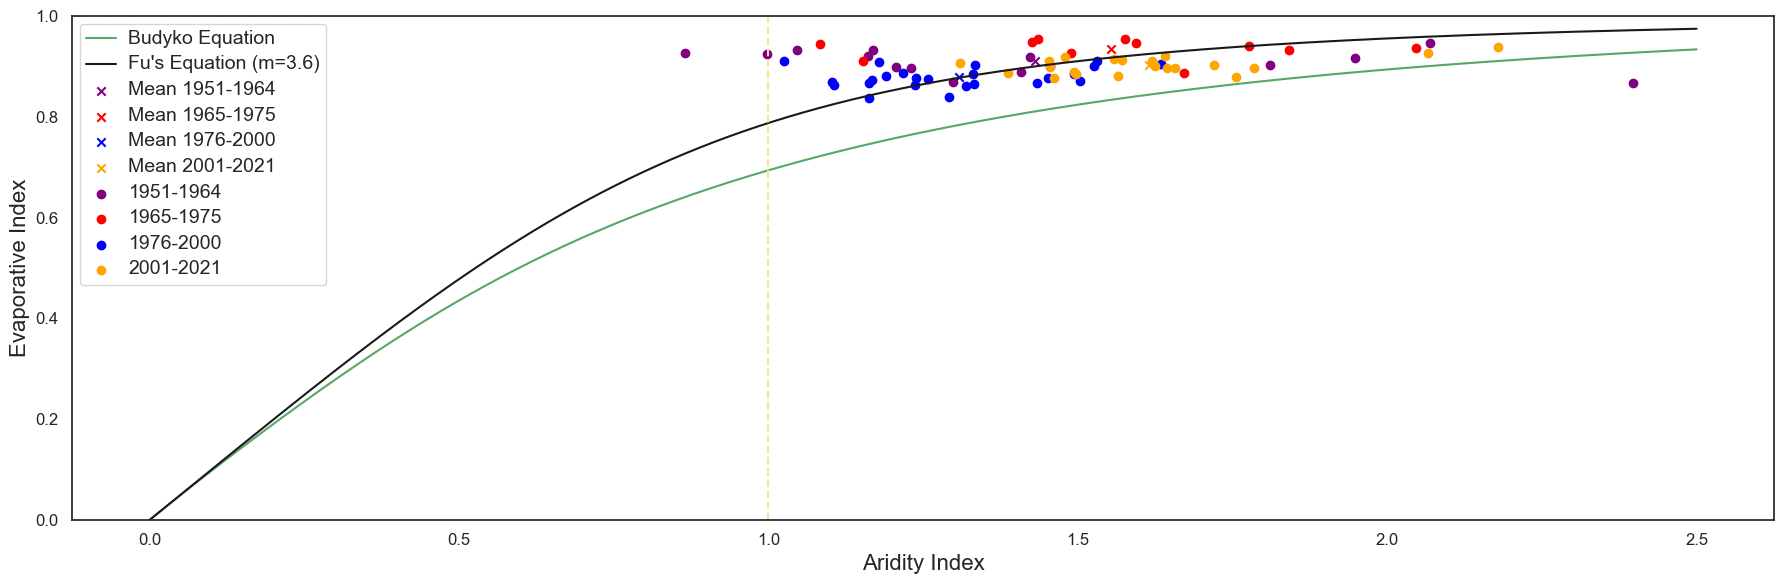

In [34]:
# Sort the data points based on the aridity index
sorted_indices = np.argsort(aridity_index)
sorted_aridity_index = aridity_index[sorted_indices]
sorted_evaporative_index = evaporative_index[sorted_indices]
sorted_years = years[sorted_indices]
plt.figure(figsize=(18, 6))

x = np.linspace(0, 2.5, 1000)
phi = x


# Function to calculate F(φ) using Fu's equation
def fu_equation(phi, m):
    return 1 + phi - (1 + phi ** m) ** (1 / m)


# Function to calculate ET/P using the given equation
def calculate_ETP(phi, w):
    return (1 + (phi) ** (-w)) ** (-1 / w)


# Function to calculate ET/P using the Budyko equation
def budyko_equation(phi):
    return (phi * np.tanh(1 / phi) * (1 - np.exp(- phi))) ** 0.5


# Calculate ET/P using the Budyko equation for the given range of φ values
etp = budyko_equation(phi)

# Plot the Budyko equation curve
plt.plot(phi, etp, 'g-', label="Budyko Equation")

# Adjust the m parameter for Fu's equation
m = 3.6

# Calculate F(φ) using Fu's equation for the given range of φ values
f_phi = fu_equation(phi, m)

# Plot the Fu's equation curve
plt.plot(phi, f_phi, 'k-', label="Fu's Equation (m={})".format(m))

# Define the data points for different time periods
aridity_1951_1964 = sorted_aridity_index[(sorted_years >= 1951) & (sorted_years <= 1964)]
evaporative_1951_1964 = sorted_evaporative_index[(sorted_years >= 1951) & (sorted_years <= 1964)]

aridity_1951_1980 = sorted_aridity_index[(sorted_years >= 1965) & (sorted_years <= 1975)]
evaporative_1951_1980 = sorted_evaporative_index[(sorted_years >= 1965) & (sorted_years <= 1975)]

aridity_1981_1999 = sorted_aridity_index[(sorted_years >= 1976) & (sorted_years <= 2000)]
evaporative_1981_1999 = sorted_evaporative_index[(sorted_years >= 1976) & (sorted_years <= 2000)]

aridity_2000_2023 = sorted_aridity_index[sorted_years >= 2001]
evaporative_2000_2023 = sorted_evaporative_index[sorted_years >= 2001]

# Plot the data points with color based on the year range and add labels
plt.scatter(aridity_1951_1964.mean(), evaporative_1951_1964.mean(), c='purple', marker='x', label='Mean 1951-1964')
plt.scatter(aridity_1951_1980.mean(), evaporative_1951_1980.mean(), c='red', marker='x', label='Mean 1965-1975')
plt.scatter(aridity_1981_1999.mean(), evaporative_1981_1999.mean(), c='blue', marker='x', label='Mean 1976-2000')
plt.scatter(aridity_2000_2023.mean(), evaporative_2000_2023.mean(), c='orange', marker='x', label='Mean 2001-2021')

# Plot the data points with color based on the year range and add labels
plt.scatter(aridity_1951_1964, evaporative_1951_1964, c='purple', label='1951-1964')
plt.scatter(aridity_1951_1980, evaporative_1951_1980, c='red', label='1965-1975')
plt.scatter(aridity_1981_1999, evaporative_1981_1999, c='blue', label='1976-2000')
plt.scatter(aridity_2000_2023, evaporative_2000_2023, c='orange', label='2001-2021')

# Draw lines at x=1 and y=1
plt.axvline(x=1, color='#F7E29F', linestyle='--')
plt.axhline(y=1, color='#F7E29F', linestyle='--')

plt.xlabel('Aridity Index', fontsize=16)
plt.ylabel('Evaporative Index', fontsize=16)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.ylim(0, 1)

# Add legend for the Budyko curve, Fu's equation, ETP curve, and data points
plt.legend()

# Add legend with increased fontsize
legend = plt.legend()
for label in legend.get_texts():
    label.set_fontsize(14)

# Display the plot
plt.tight_layout()
#plt.savefig('Figure3a.tiff', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\cb3910\AppData\Local\Temp\ipykernel_132072\2288620952.py:19: RuntimeWarning: divide by zero encountered in divide
  return (phi * np.tanh(1 / phi) * (1 - np.exp(- phi))) ** 0.5
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


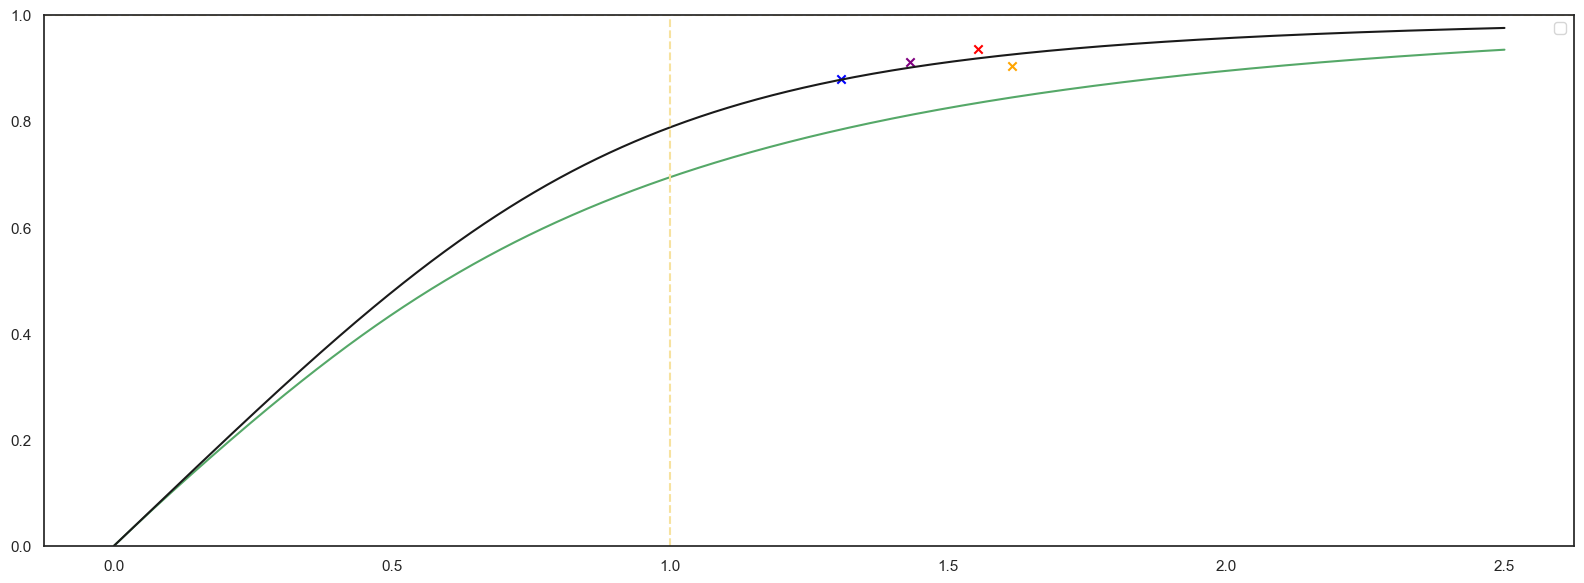

In [35]:
plt.figure(figsize=(16, 6))

x = np.linspace(0, 2.5, 1000)
phi = x


# Function to calculate F(φ) using Fu's equation
def fu_equation(phi, m):
    return 1 + phi - (1 + phi ** m) ** (1 / m)


# Function to calculate ET/P using the given equation
def calculate_ETP(phi, w):
    return (1 + (phi) ** (-w)) ** (-1 / w)


# Function to calculate ET/P using the Budyko equation
def budyko_equation(phi):
    return (phi * np.tanh(1 / phi) * (1 - np.exp(- phi))) ** 0.5


# Calculate ET/P using the Budyko equation for the given range of φ values
etp = budyko_equation(phi)

# Plot the Budyko equation curve
#plt.plot(phi, etp, 'g-', label="Budyko Equation")
plt.plot(phi, etp, 'g-')

# Adjust the m parameter for Fu's equation
m = 3.6

# Calculate F(φ) using Fu's equation for the given range of φ values
f_phi = fu_equation(phi, m)

# Plot the Fu's equation curve
#plt.plot(phi, f_phi, 'k-', label="Fu's Equation (m={})".format(m))
plt.plot(phi, f_phi, 'k-')

# Define the data points for different time periods
aridity_1951_1964 = sorted_aridity_index[(sorted_years >= 1951) & (sorted_years <= 1964)]
evaporative_1951_1964 = sorted_evaporative_index[(sorted_years >= 1951) & (sorted_years <= 1964)]

aridity_1951_1980 = sorted_aridity_index[(sorted_years >= 1965) & (sorted_years <= 1975)]
evaporative_1951_1980 = sorted_evaporative_index[(sorted_years >= 1965) & (sorted_years <= 1975)]

aridity_1981_1999 = sorted_aridity_index[(sorted_years >= 1976) & (sorted_years <= 2000)]
evaporative_1981_1999 = sorted_evaporative_index[(sorted_years >= 1976) & (sorted_years <= 2000)]

aridity_2000_2023 = sorted_aridity_index[sorted_years >= 2001]
evaporative_2000_2023 = sorted_evaporative_index[sorted_years >= 2001]

# Plot the data points with color based on the year range and add labels
plt.scatter(aridity_1951_1964.mean(), evaporative_1951_1964.mean(), c='purple', marker='x')
plt.scatter(aridity_1951_1980.mean(), evaporative_1951_1980.mean(), c='red', marker='x')
plt.scatter(aridity_1981_1999.mean(), evaporative_1981_1999.mean(), c='blue', marker='x')
plt.scatter(aridity_2000_2023.mean(), evaporative_2000_2023.mean(), c='orange', marker='x')

# Draw lines at x=1 and y=1
plt.axvline(x=1, color='#F7E29F', linestyle='--')
plt.axhline(y=1, color='#F7E29F', linestyle='--')

#plt.xlabel('Aridity Index', fontsize=16)
#plt.ylabel('Evaporative Index', fontsize=16)
#plt.tick_params(axis='x', labelsize=12) 
#plt.tick_params(axis='y', labelsize=12)

plt.ylim(0, 1)

# Add legend for the Budyko curve, Fu's equation, ETP curve, and data points
plt.legend()
# Add legend with increased fontsize
legend = plt.legend()
for label in legend.get_texts():
    label.set_fontsize(14)

plt.tight_layout()
#plt.savefig('Figure3b_inset.tiff', dpi=300, bbox_inches='tight')
plt.show()

# Calculating the anomalies

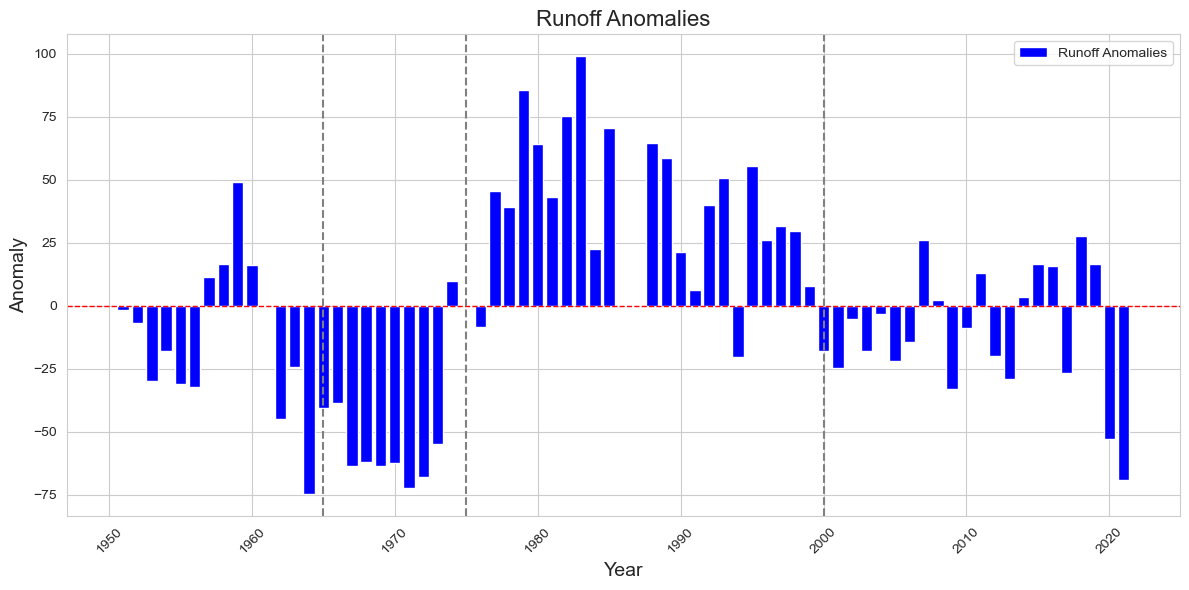

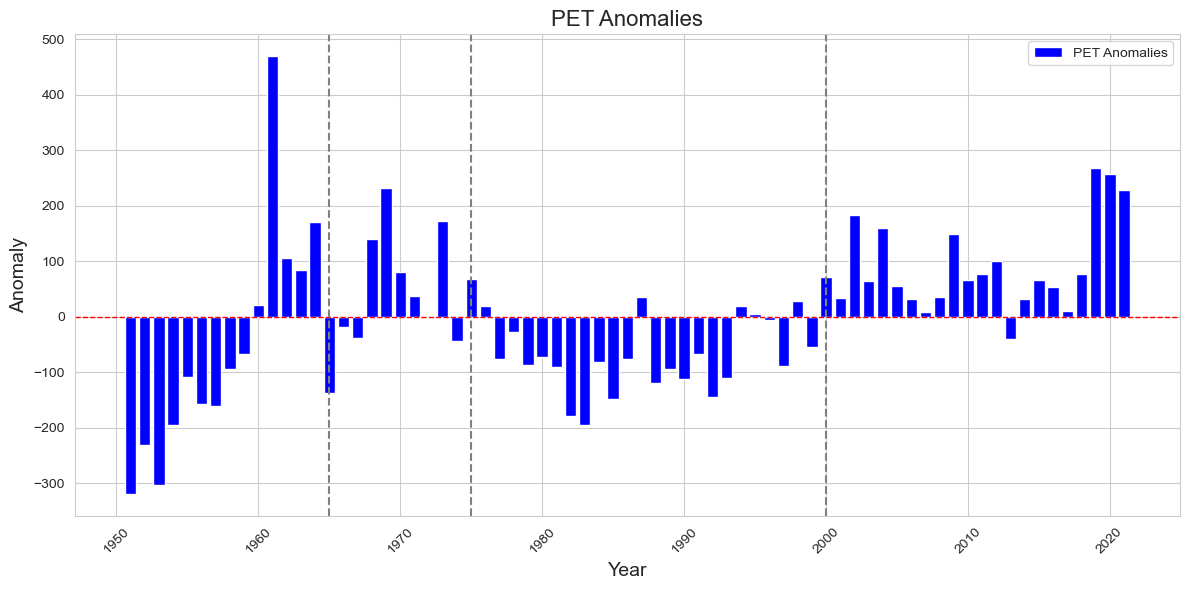

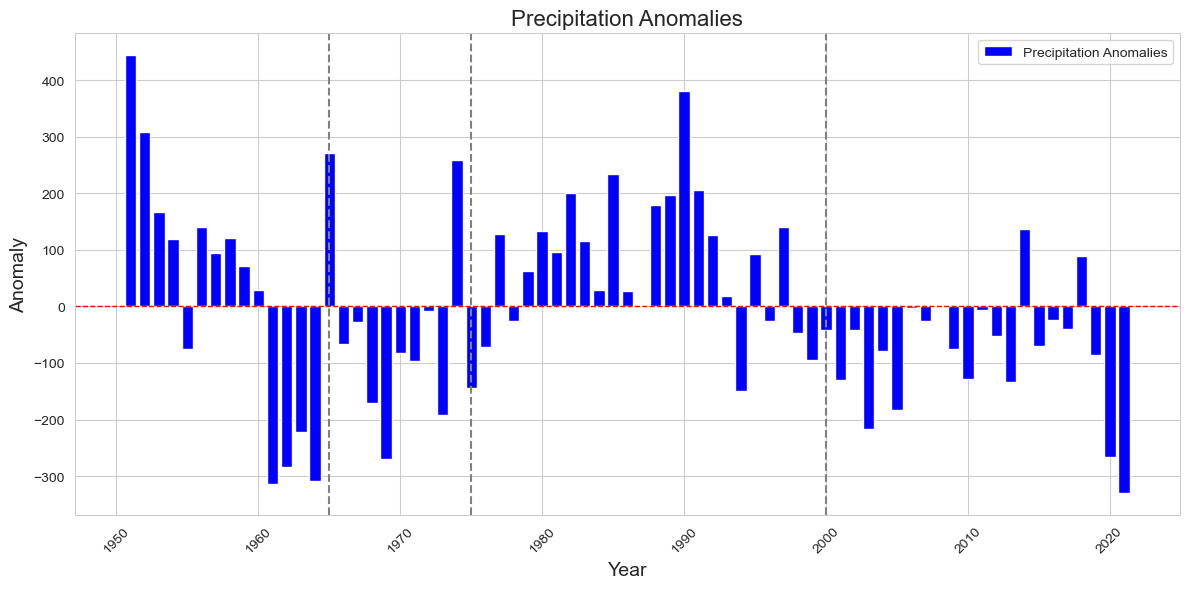

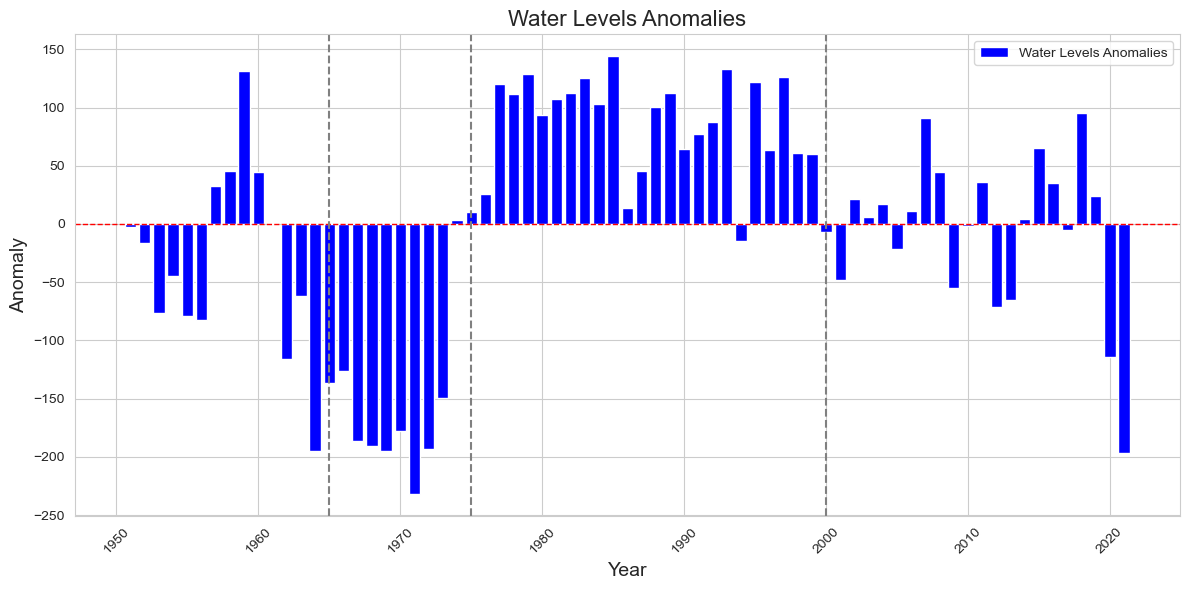

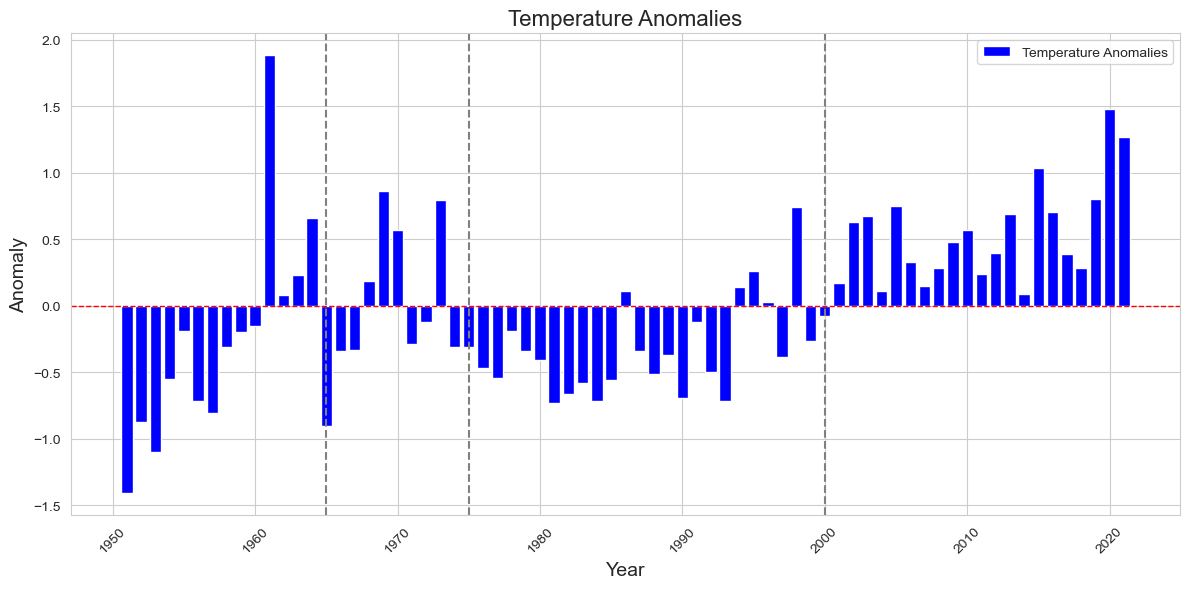

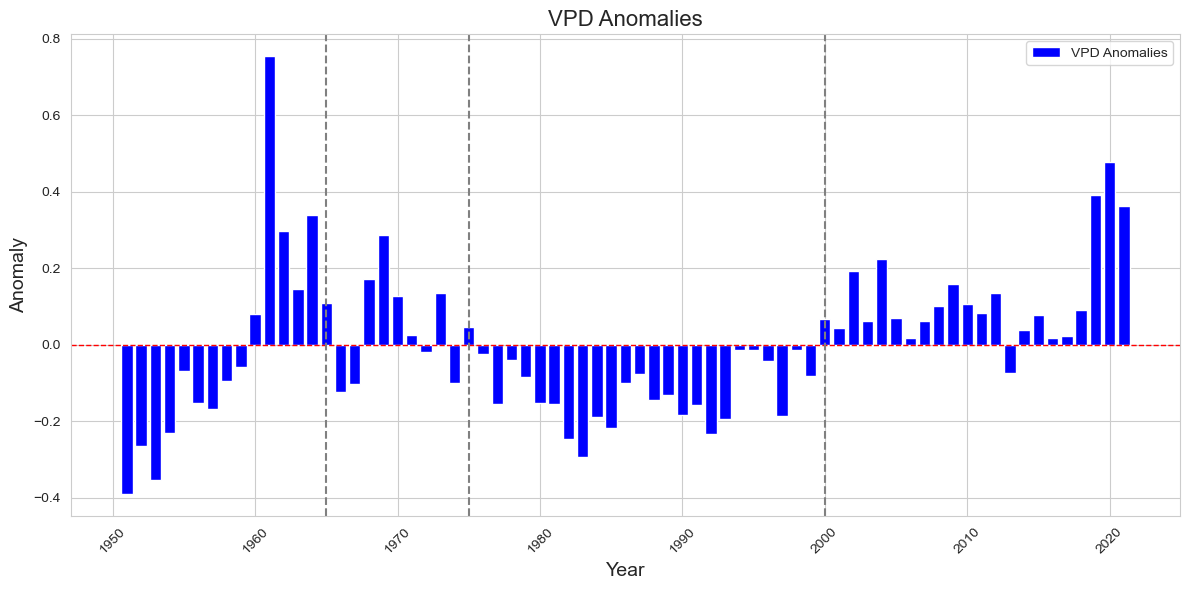

In [12]:
# Create a subset of the relevant columns
variables = ['hydro_year', 'runoff_mm', 'ETr', 'Precip_basin', 'Media', 'TEMP', 'VPD']
data = df[variables]

data = data.rename(columns={
    'runoff_mm': 'Runoff', 
    'ETr': 'PET', 
    'Precip_basin': 'Precipitation', 
    'Media': 'Water Levels', 
    'TEMP': 'Temperature', 
    'VPD': 'VPD'
})

data.set_index('hydro_year', inplace=True)

# Calculate anomalies for each variable (subtract the mean from each value)
anomalies = data.apply(lambda x: x - x.mean())

# Plot anomalies for each variable
for column in anomalies.columns:
    plt.figure(figsize=(12, 6))  # Larger size for each individual plot
    plt.bar(anomalies.index, anomalies[column], label=f'{column} Anomalies', color='b')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Reference line at zero anomaly
    plt.axvline(x=1965, color='grey', linestyle='--')
    plt.axvline(x=1975, color='grey', linestyle='--')
    plt.axvline(x=2000, color='grey', linestyle='--')
    plt.title(f'{column} Anomalies', fontsize=16)
    plt.xlabel('Year', fontsize=14)  # Label for the years
    plt.ylabel('Anomaly', fontsize=14)
    plt.xticks(rotation=45)  # Rotate the year labels for better readability
    plt.legend()
    plt.tight_layout()
    plt.show()